In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt

TOPICS = {
    "topics.topic_0": "Command Line",
    "topics.topic_1": "Client-Server",
    "topics.topic_2": "Cloud",
    "topics.topic_3": "Resource Management",
    "topics.topic_4": "Error Handling & Logging"
}



In [2]:
df = pd.read_csv('full.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
for col in df.columns:
	if 'language' in col:
		df.drop(columns=[col], inplace=True)
df.describe()

,analyzed_paths,pairs,similarities,issues,commits,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
count,13703.000000,1.370300e+04,10467.000000,13703.000000,13703.000000,13703.000000,13703.000000,11468.000000,9266.000000,9049.000000,13703.000000,1.370300e+04,1.370300e+04,13703.000000,8324.000000,6996.000000
mean,76.884259,5.942503e+04,154.098596,174.068379,784.590309,26.883456,1160.930453,0.360950,0.279739,0.260759,10936.597023,8.822849e+04,1.700028e+04,350.551850,0.279741,0.319453
std,336.190415,1.930047e+06,1014.191085,1096.738333,3401.684323,96.088596,3632.434057,0.256544,0.213156,0.210155,42794.313040,3.295197e+05,9.286598e+04,1258.837789,0.237410,0.271506
min,2.000000,1.000000e+00,0.000000,0.000000,1.000000,-1.000000,101.000000,0.010099,0.010063,0.010016,10.000000,7.200000e+01,0.000000e+00,2.000000,0.010025,0.010026
25%,6.000000,1.500000e+01,7.000000,7.000000,65.000000,3.000000,159.000000,0.143918,0.108315,0.090124,255.000000,1.498000e+03,1.170000e+02,15.000000,0.084595,0.076527
50%,17.000000,1.360000e+02,30.000000,25.000000,173.000000,7.000000,286.000000,0.309139,0.228687,0.206502,755.000000,4.567000e+03,4.380000e+02,40.000000,0.209104,0.244908
75%,51.000000,1.275000e+03,117.000000,88.000000,513.000000,21.000000,731.000000,0.537906,0.408324,0.386560,3188.000000,2.098000e+04,2.306000e+03,145.000000,0.422939,0.519784
max,18370.000000,1.687193e+08,80513.000000,60246.000000,164293.000000,3927.000000,117805.000000,0.999101,0.999764,0.997521,827986.000000,6.593969e+06,2.693242e+06,33349.000000,0.996716,0.999707


In [4]:
epsilon = 1e-6
df['contributors'] = df['contributors'].apply(lambda x: x if x > 0 else epsilon)
df['commits'] = df['commits'].apply(lambda x: x if x > 0 else epsilon)
df['issues'] = df['issues'].apply(lambda x: x if x > 0 else epsilon)
df['stars'] = df['stars'].apply(lambda x: x if x > 0 else epsilon)
df['analyzed_paths'] = df['analyzed_paths'].apply(lambda x: x if x > 0 else epsilon)
df['pairs'] = df['pairs'].apply(lambda x: x if x > 0 else epsilon)
df['similarities'] = df['similarities'].apply(lambda x: x if x > 0 else epsilon)

# df2 = df.loc[:, ["similarities", "issues"]]
# 
# epsilon = 1e-9
# df2['issues'] = df2['issues'].apply(lambda x: x if x > 0 else epsilon)
# df2.corr()


In [5]:
df_nona = df.dropna()

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
df.head()

Mean Squared Error: 96836.40828933466
Coefficients: [ 1.12912796e-04  1.97676821e-01 -8.05711146e-04  4.06896989e-06
 -4.39483167e-02 -4.01863091e-02]
Intercept: 117.08980766371077


,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
0,mislav/hub,46,1035,150.0,2018.000000,MIT,3337,2009-12-05,244.0,22649,0.692835,0.247408,0.058288,2539,12621,110,97,NaN,NaN
1,getlantern/lantern,893,398278,138.0,0.000001,NaN,6252,2011-02-17,59.0,13937,0.888254,NaN,0.106459,45439,425248,43672,1701,NaN,NaN
2,direnv/direnv,37,666,171.0,664.000000,MIT,1132,2011-01-04,213.0,11397,0.333218,0.591452,NaN,760,3971,327,64,0.074183,NaN
3,patrickmn/go-cache,2,1,248.0,92.000000,MIT,163,2012-01-02,7.0,7693,NaN,0.232586,0.029679,237,2759,213,4,NaN,0.734904
4,miekg/dns,39,741,1746.0,605.000000,BSD-3-Clause,4173,2010-08-03,227.0,7661,0.118695,0.071108,0.575756,3529,27510,2559,89,0.025523,0.208917


In [6]:
df['log_stars'] = np.log1p(df['stars'])
df['log_contributors'] = np.log1p(df['contributors'])
df['log_commits'] = np.log1p(df['commits'])
df['log_pairs'] = np.log1p(df['pairs'])
df['log_analyzed_paths'] = np.log1p(df['analyzed_paths'])
df['log_issues'] = np.log1p(df['issues'])

In [7]:
sample = df.sample(100)

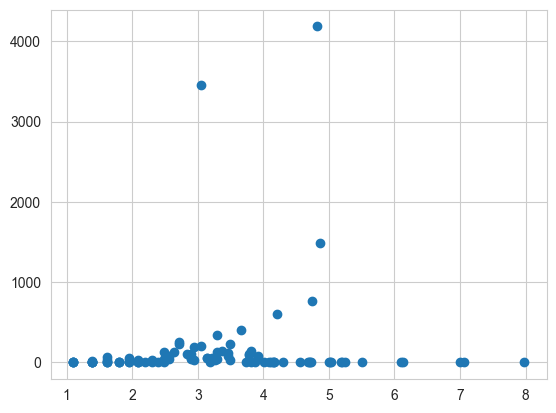

In [8]:
plt.scatter(sample['log_analyzed_paths'], sample['similarities'])

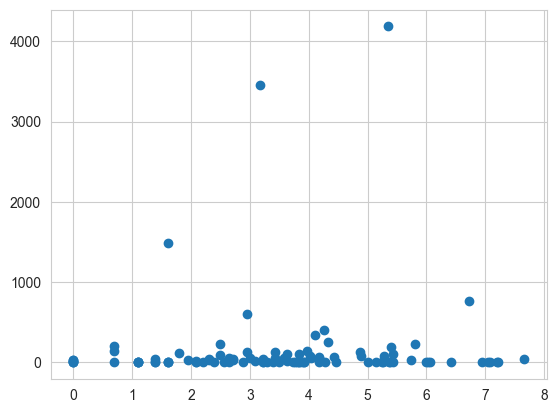

In [9]:
plt.scatter(sample['log_issues'], sample['similarities'])

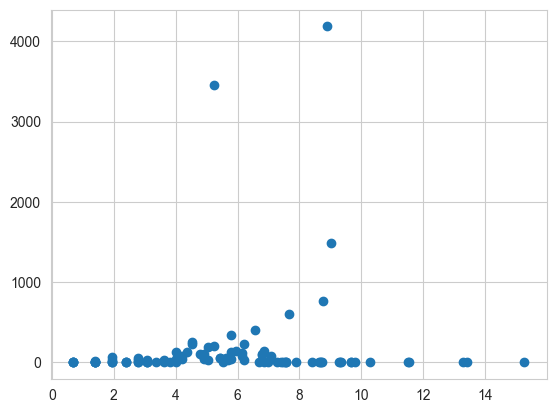

In [10]:
plt.scatter(sample['log_pairs'], sample['similarities'])

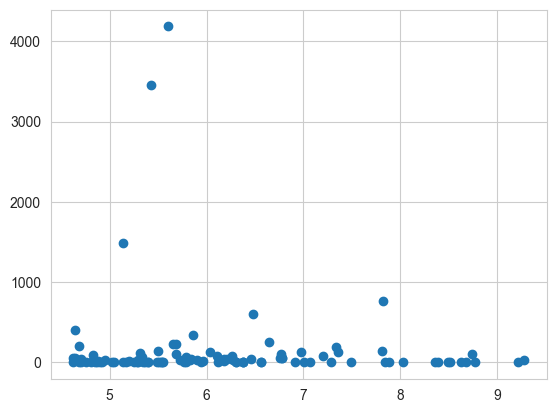

In [11]:
plt.scatter(sample['log_stars'], sample['similarities'])

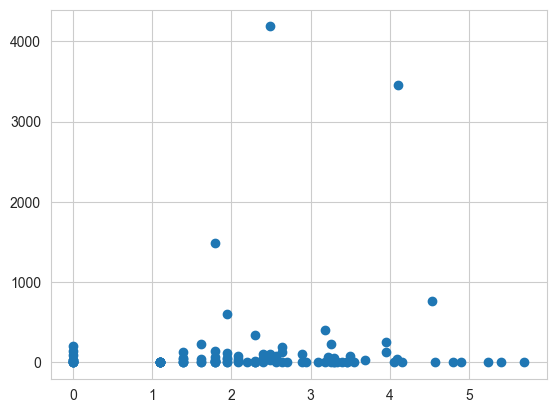

In [12]:
plt.scatter(sample['log_contributors'], sample['similarities'])

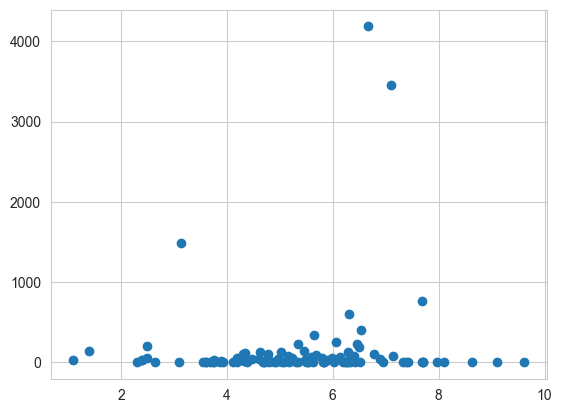

In [13]:
plt.scatter(sample['log_commits'], sample['similarities'])

In [14]:
reg_stars = np.polyfit(sample['log_stars'], sample['similarities'], deg = 1)
reg_stars

array([-39.1324013 , 389.41111281])

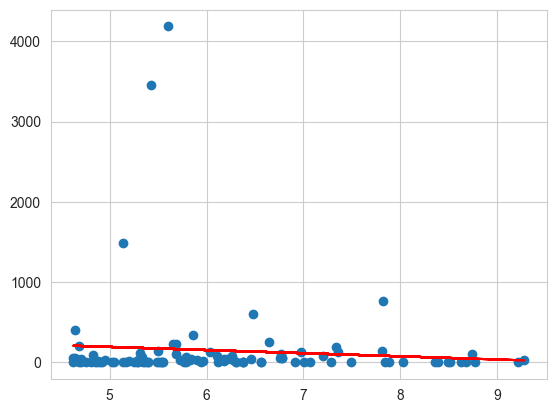

In [15]:
trend_stars = np.polyval(reg_stars, sample['log_stars'])
plt.scatter(sample['log_stars'], sample['similarities'])
plt.plot(sample['log_stars'], trend_stars, color='red')

In [16]:
reg_contributors = np.polyfit(sample['log_contributors'], sample['similarities'], deg = 1)
reg_contributors

array([43.98859407, 46.68661421])

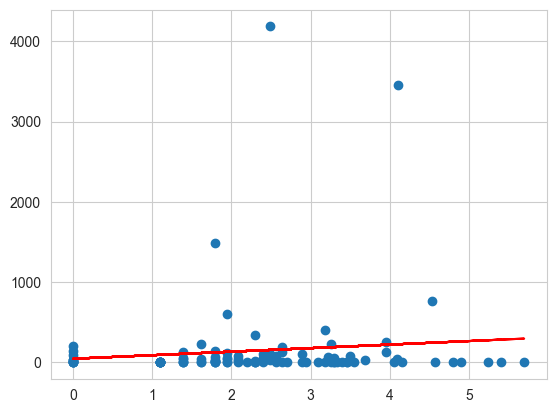

In [17]:
trend_contributors = np.polyval(reg_contributors, sample['log_contributors'])
plt.scatter(sample['log_contributors'], sample['similarities'])
plt.plot(sample['log_contributors'], trend_contributors, color='red')

In [18]:
reg_commits = np.polyfit(sample['log_commits'], sample['similarities'], deg = 1)
reg_commits

array([ 40.41130649, -67.27636092])

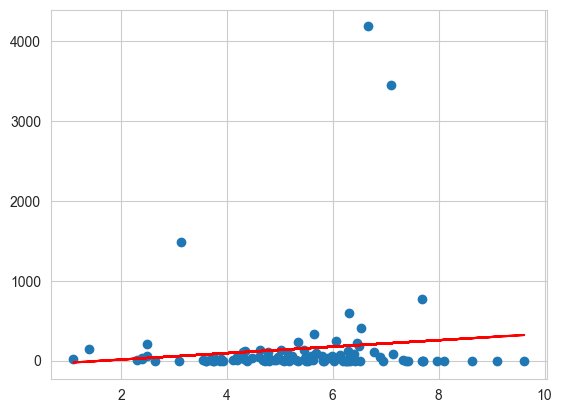

In [19]:
trend_commits = np.polyval(reg_commits, sample['log_commits'])
plt.scatter(sample['log_commits'], sample['similarities'])
plt.plot(sample['log_commits'], trend_commits, color='red')

In [20]:
reg_pairs = np.polyfit(sample['log_pairs'], sample['similarities'], deg = 1)
reg_pairs

array([22.39332037, 24.10191742])

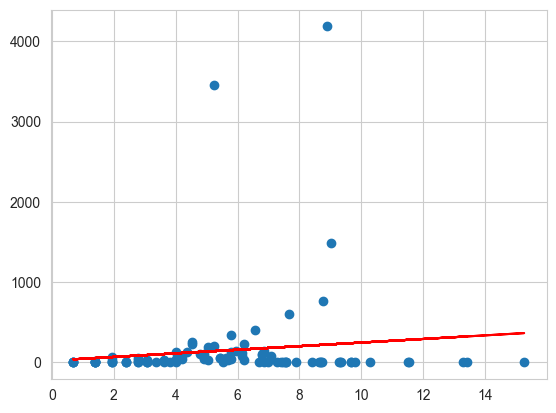

In [21]:
trend_pairs = np.polyval(reg_pairs, sample['log_pairs'])
plt.scatter(sample['log_pairs'], sample['similarities'])
plt.plot(sample['log_pairs'], trend_pairs, color='red')

In [22]:
reg_analyzed_paths = np.polyfit(sample['log_analyzed_paths'], sample['similarities'], deg = 1)
reg_analyzed_paths

array([46.18396363, -1.15217255])

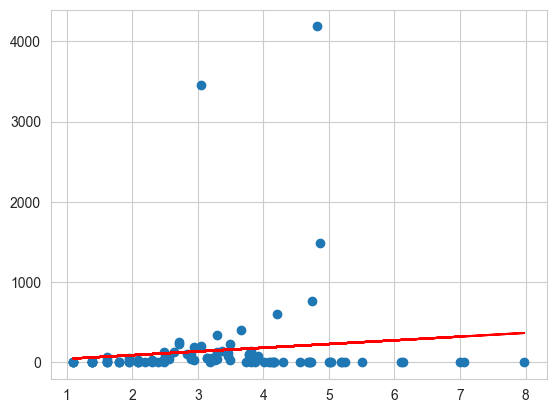

In [23]:
trend_analyzed_paths = np.polyval(reg_analyzed_paths, sample['log_analyzed_paths'])
plt.scatter(sample['log_analyzed_paths'], sample['similarities'])
plt.plot(sample['log_analyzed_paths'], trend_analyzed_paths, color='red')

In [24]:
reg_issues = np.polyfit(sample['log_issues'], sample['similarities'], deg = 1)
reg_issues

array([18.76891201, 82.60512685])

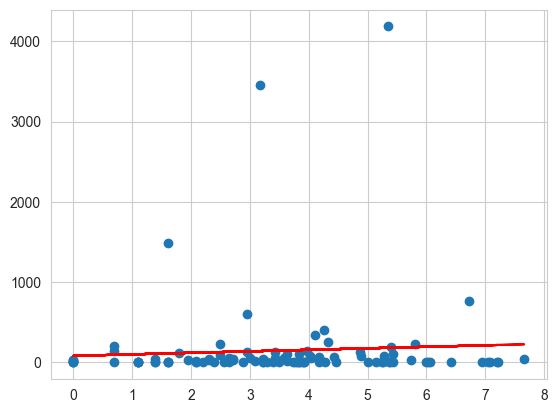

In [25]:
trend_issues = np.polyval(reg_issues, sample['log_issues'])
plt.scatter(sample['log_issues'], sample['similarities'])
plt.plot(sample['log_issues'], trend_issues, color='red')

<Axes: xlabel='log_stars', ylabel='similarities'>

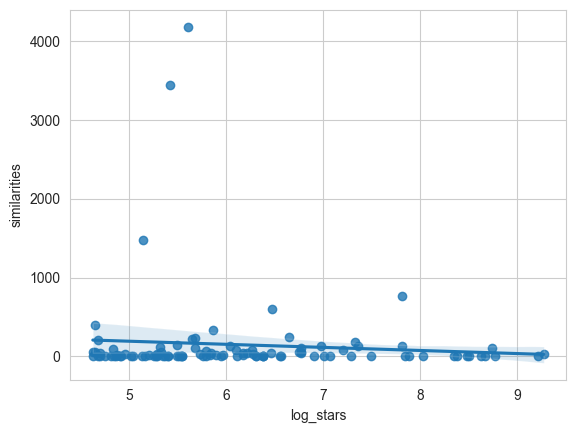

In [26]:
sb.regplot(x='log_stars', y='similarities', data=sample)

# Regression as a Technical Indicator

In [27]:
reg1 = np.polyfit(sample['log_stars'], sample['similarities'], deg = 1)
reg1

array([-39.1324013 , 389.41111281])

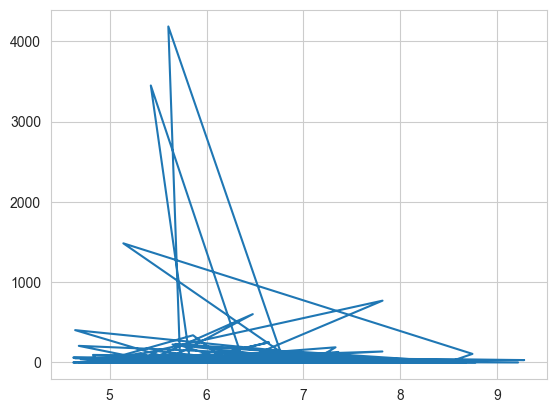

In [28]:
trend1 = np.polyval(reg1, sample['log_stars'][-63:])
std = sample['similarities'][-63:].std()
plt.plot(sample['log_stars'], sample['similarities'], label = 'Similarities')

## Correlation Analysis

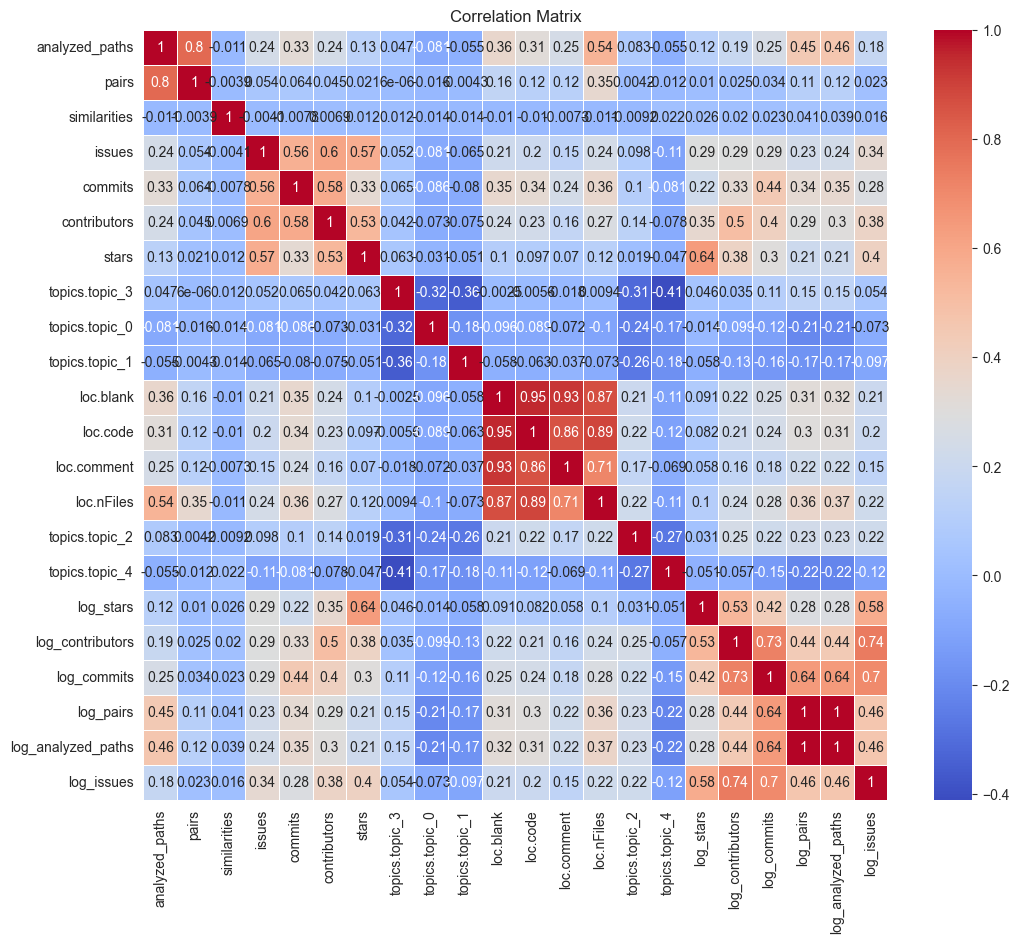

In [29]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Random Forest

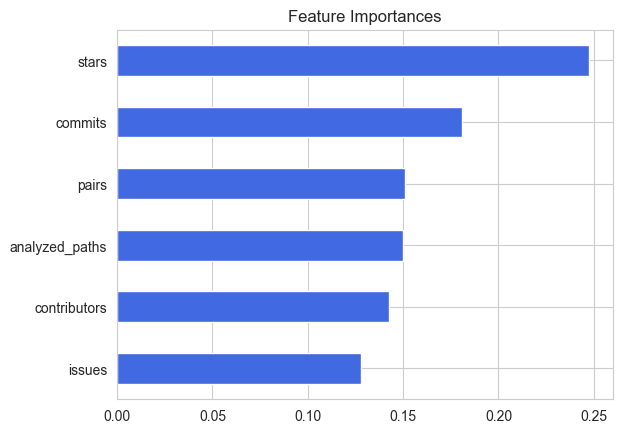

In [30]:
from sklearn.ensemble import RandomForestRegressor

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances.sort_values().plot(kind='barh', color='royalblue')
plt.title('Feature Importances')
plt.show()

# Topic Distribution

In [31]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df_nona.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
# tdf.head()






In [43]:
tdf_resources = tdf[tdf['max_value_topic'] == 'topics.topic_3']
tdf_resources

,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,topics.topic_2,topics.topic_4,log_stars,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,max_value_topic,max_value_topic_amount
0,mislav/hub,46,1035,150.000000,2018.000000,MIT,3337,2009-12-05,244.000000,22649,...,NaN,NaN,10.027915,5.501258e+00,8.113127,6.943122,3.850148,7.610358e+00,topics.topic_3,0.692835
1,getlantern/lantern,893,398278,138.000000,0.000001,NaN,6252,2011-02-17,59.000000,13937,...,NaN,NaN,9.542374,4.094345e+00,8.740817,12.894908,6.795706,9.999995e-07,topics.topic_3,0.888254
5,lxn/walk,187,17391,0.000001,651.000000,NOASSERTION,1671,2010-09-16,30.000000,6671,...,0.274850,0.142453,8.805675,3.433987e+00,7.421776,9.763766,5.236442,6.480045e+00,topics.topic_3,0.347536
6,perkeep/perkeep,306,46665,5.000000,1312.000000,Apache-2.0,7456,2011-01-03,136.000000,6353,...,0.281420,NaN,8.756840,4.919981e+00,8.916908,10.750771,5.726848,7.180070e+00,topics.topic_3,0.702860
7,tealeg/xlsx,21,210,173.000000,455.000000,NOASSERTION,1196,2011-06-28,118.000000,5698,...,NaN,0.096001,8.648046,4.779123e+00,7.087574,5.351858,3.091042,6.122493e+00,topics.topic_3,0.490550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,nanmu42/tart,9,36,7.000000,1.000000,MIT,23,2022-10-24,0.000001,102,...,0.244919,NaN,4.634729,9.999995e-07,3.178054,3.610918,2.302585,6.931472e-01,topics.topic_3,0.500769
13696,knbr13/gitcs,3,3,0.000001,3.000000,MIT,200,2023-05-24,4.000000,102,...,NaN,NaN,4.634729,1.609438e+00,5.303305,1.386294,1.386294,1.386294e+00,topics.topic_3,0.705512
13697,sealdice/sealdice-core,112,6216,0.000001,197.000000,MIT,1007,2022-11-20,9.000000,102,...,NaN,NaN,4.634729,2.302585e+00,6.915723,8.735043,4.727388,5.288267e+00,topics.topic_3,0.971190
13698,secretflow/scql,233,27028,0.000001,105.000000,Apache-2.0,128,2023-02-08,25.000000,101,...,0.348519,0.029788,4.624973,3.258097e+00,4.859812,10.204666,5.455321,4.663439e+00,topics.topic_3,0.436148


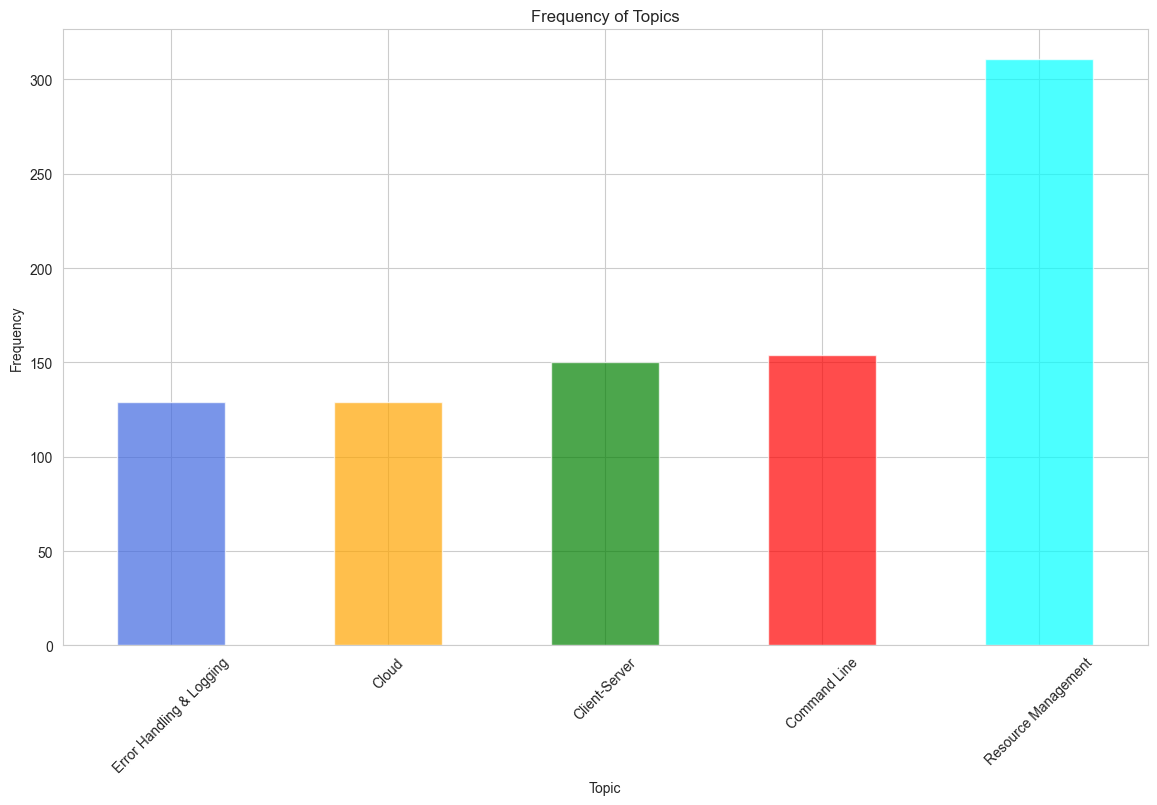

In [33]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()


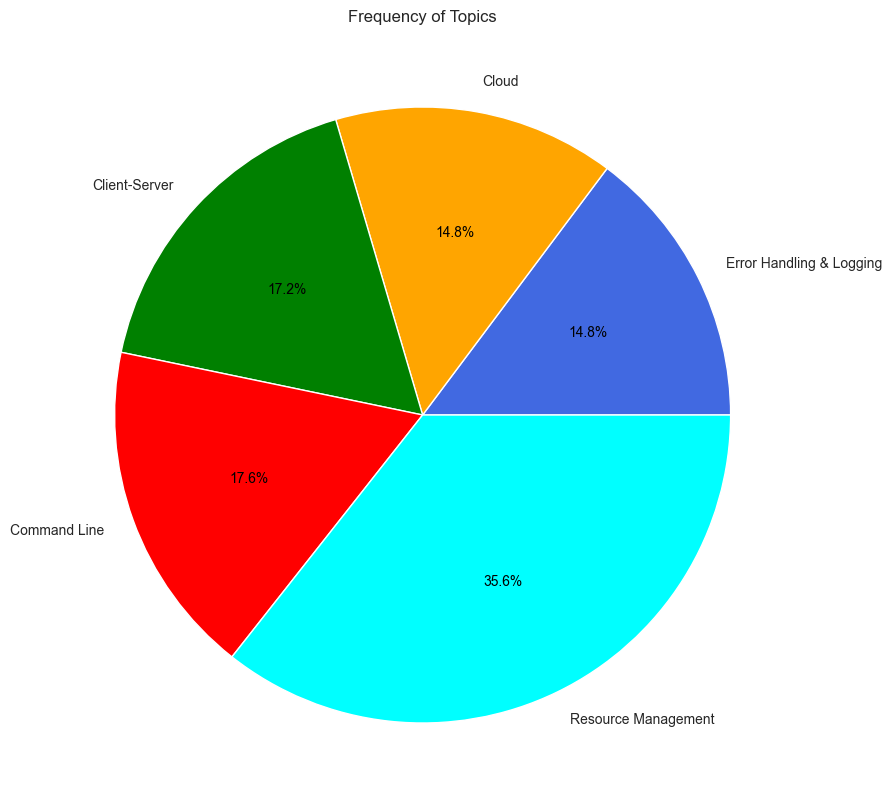

In [34]:
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(count_series, labels=count_series.index, autopct='%1.1f%%', colors=colors)
for autotext in autotexts:
	autotext.set_color('black')
plt.title('Frequency of Topics')
plt.show()



In [35]:
# verify nones
# count topics 
count_series = tdf['max_value_topic'].map(TOPICS).value_counts()
count_series

max_value_topic
Resource Management         471
Client-Server               221
Cloud                       221
Command Line                220
Error Handling & Logging    172
Name: count, dtype: int64

# Topic Distribution With Nones


In [36]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
tdf.head()


,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,topics.topic_2,topics.topic_4,log_stars,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,max_value_topic,max_value_topic_amount
0,mislav/hub,46,1035,150.0,2018.000000,MIT,3337,2009-12-05,244.0,22649,...,NaN,NaN,10.027915,5.501258,8.113127,6.943122,3.850148,7.610358e+00,topics.topic_3,0.692835
1,getlantern/lantern,893,398278,138.0,0.000001,NaN,6252,2011-02-17,59.0,13937,...,NaN,NaN,9.542374,4.094345,8.740817,12.894908,6.795706,9.999995e-07,topics.topic_3,0.888254
2,direnv/direnv,37,666,171.0,664.000000,MIT,1132,2011-01-04,213.0,11397,...,0.074183,NaN,9.341193,5.365976,7.032624,6.502790,3.637586,6.499787e+00,topics.topic_0,0.591452
3,patrickmn/go-cache,2,1,248.0,92.000000,MIT,163,2012-01-02,7.0,7693,...,NaN,0.734904,8.948196,2.079442,5.099866,0.693147,1.098612,4.532599e+00,topics.topic_4,0.734904
4,miekg/dns,39,741,1746.0,605.000000,BSD-3-Clause,4173,2010-08-03,227.0,7661,...,0.025523,0.208917,8.944028,5.429346,8.336630,6.609349,3.688879,6.406880e+00,topics.topic_1,0.575756


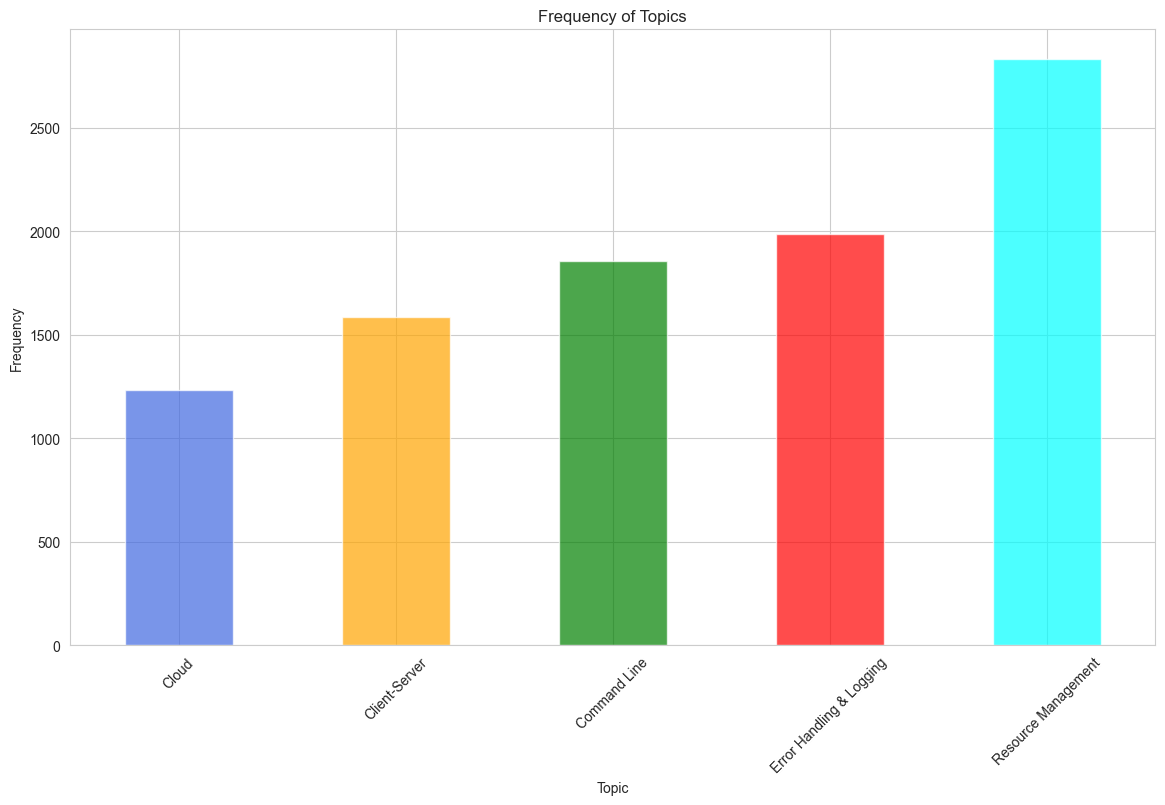

In [37]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()

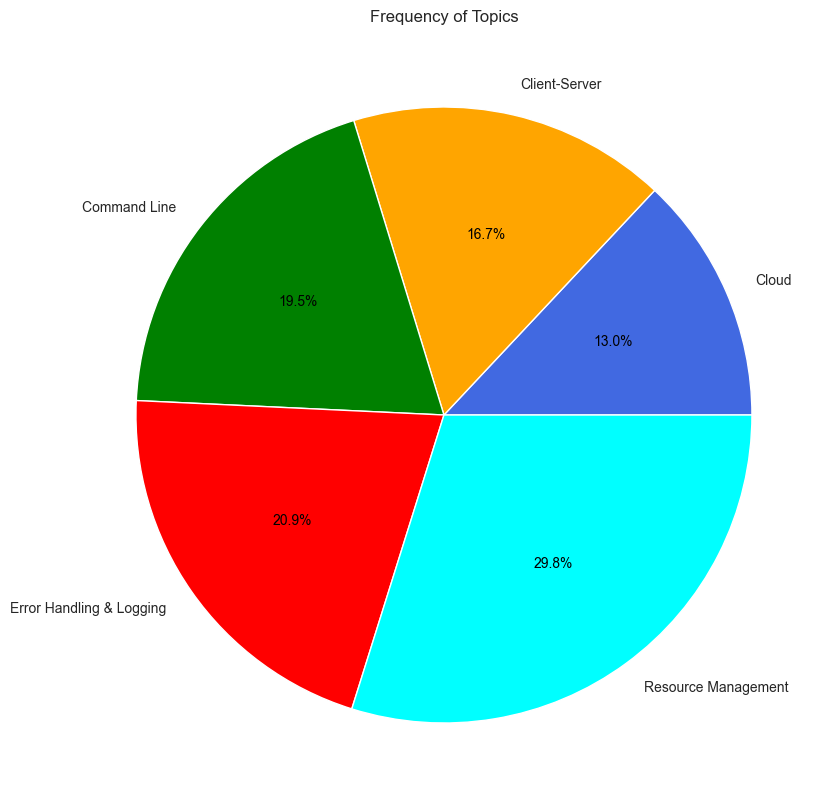

In [38]:
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(count_series, labels=count_series.index, autopct='%1.1f%%', colors=colors)
for autotext in autotexts:
    autotext.set_color('black')
plt.title('Frequency of Topics')
plt.show()



In [39]:
count_series = tdf['max_value_topic'].map(TOPICS).value_counts()
count_series


max_value_topic
Resource Management         4438
Error Handling & Logging    2429
Command Line                2389
Cloud                       2302
Client-Server               2145
Name: count, dtype: int64

# Clone Density


In [44]:
tdf['clone_density'] = (tdf['loc.nFiles'] / tdf['similarities']) * 1000
tdf.head()

,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,topics.topic_4,log_stars,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,max_value_topic,max_value_topic_amount,clone_density
0,mislav/hub,46,1035,150.0,2018.000000,MIT,3337,2009-12-05,244.0,22649,...,NaN,10.027915,5.501258,8.113127,6.943122,3.850148,7.610358e+00,topics.topic_3,0.692835,646.666667
1,getlantern/lantern,893,398278,138.0,0.000001,NaN,6252,2011-02-17,59.0,13937,...,NaN,9.542374,4.094345,8.740817,12.894908,6.795706,9.999995e-07,topics.topic_3,0.888254,12326.086957
2,direnv/direnv,37,666,171.0,664.000000,MIT,1132,2011-01-04,213.0,11397,...,NaN,9.341193,5.365976,7.032624,6.502790,3.637586,6.499787e+00,topics.topic_0,0.591452,374.269006
3,patrickmn/go-cache,2,1,248.0,92.000000,MIT,163,2012-01-02,7.0,7693,...,0.734904,8.948196,2.079442,5.099866,0.693147,1.098612,4.532599e+00,topics.topic_4,0.734904,16.129032
4,miekg/dns,39,741,1746.0,605.000000,BSD-3-Clause,4173,2010-08-03,227.0,7661,...,0.208917,8.944028,5.429346,8.336630,6.609349,3.688879,6.406880e+00,topics.topic_1,0.575756,50.973654


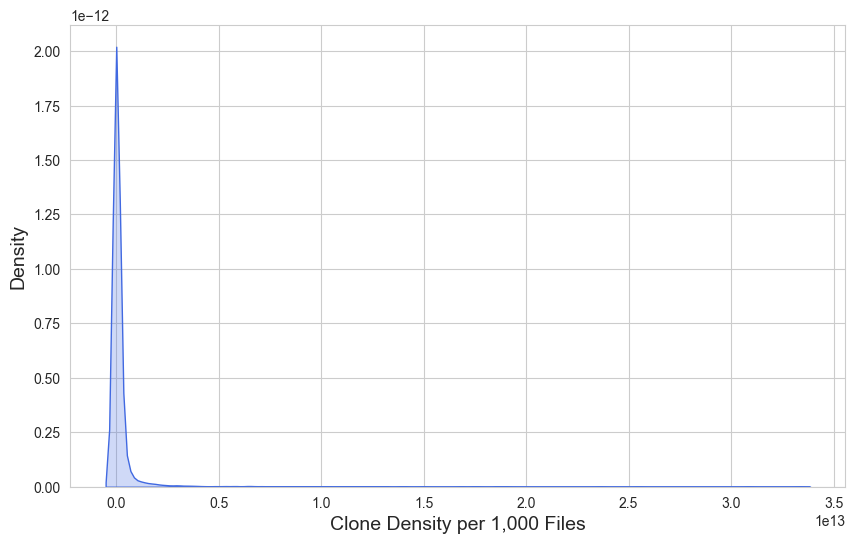

In [54]:
# Assuming df is your DataFrame with the clone density already calculated
plt.figure(figsize=(10, 6))

# Density Plot
sb.kdeplot(tdf['clone_density'], fill=True, color='royalblue')

# Adding titles and labels
# plt.title('Density Plot of Clone Density per 1,000 Files Across Repositories', fontsize=16)
plt.xlabel('Clone Density per 1,000 Files', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Display the plot
plt.show()

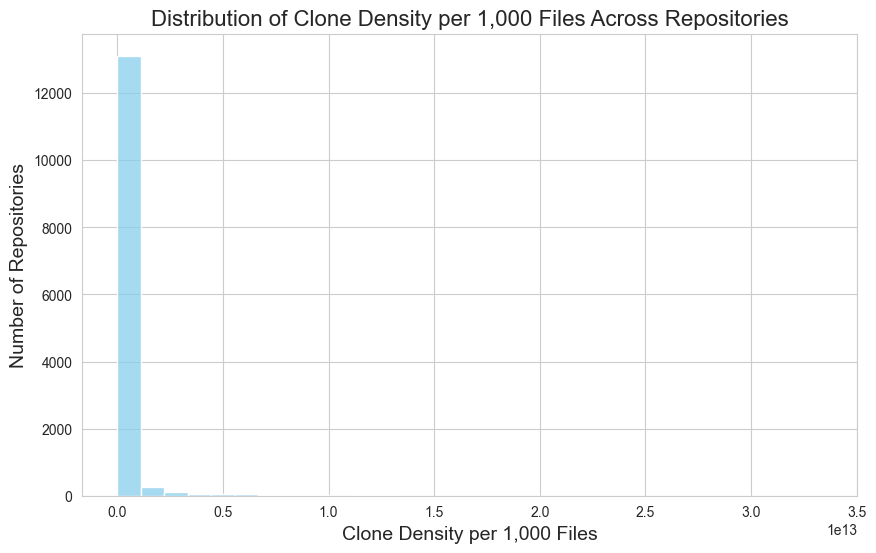

In [52]:
plt.figure(figsize=(10, 6))

# Histogram
sb.histplot(tdf['clone_density'], kde=False, bins=30, color='skyblue')

# Adding titles and labels
plt.title('Distribution of Clone Density per 1,000 Files Across Repositories', fontsize=16)
plt.xlabel('Clone Density per 1,000 Files', fontsize=14)
plt.ylabel('Number of Repositories', fontsize=14)

# Display the plot
plt.show()